<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Cinzel&family=Rokkitt:ital@1&display=swap" rel="stylesheet">

<h1 style="text-align:center;font-family: 'Cinzel', serif;">Practical Lab 9</h1>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Waseem Raja Shaik</h2>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Student Id - 8894805</h2>

# Lab 9 - Dense Neural Network

1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points). 


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


# Load fashion_mnist dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

2023-07-21 19:34:52.724997: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The fMNIST dataset is a variation of the original MNIST dataset. It contains grayscale images of 28x28 pixels, but instead of digits, it consists of images of fashion items from 10 different classes:
| Label | Description   |
|-------|---------------|
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |



In [4]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


- train_images: Grayscale image data containing the training data with shapes (60000, 28, 28).
- train_labels: Labels for the training data, represented as integers in the range of 0-9, with shape (60000,).
- test_images: Grayscale image data containing the test data with shapes (10000, 28, 28).
- test_labels: Labels for the test data, represented as integers in the range of 0-9, with shape (10000,).

### show images of 25 training data

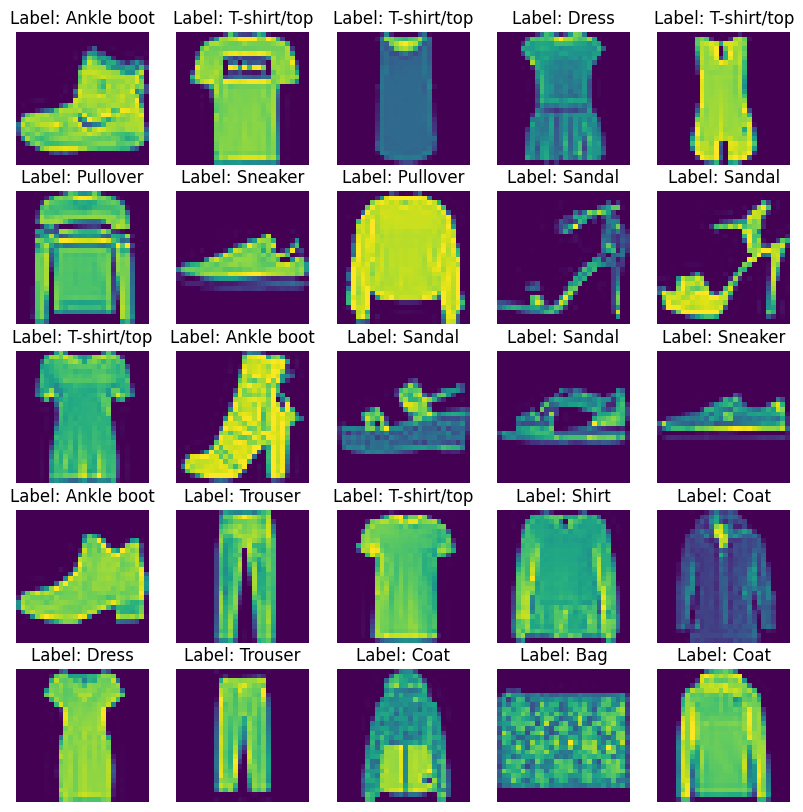

In [5]:
label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i]) # Removed cmap=gray - Feels like airport scanning
    plt.title(f"Label: {label_description[train_labels[i]]}")
    plt.axis('off')
plt.show()

### show images of 25 testing data

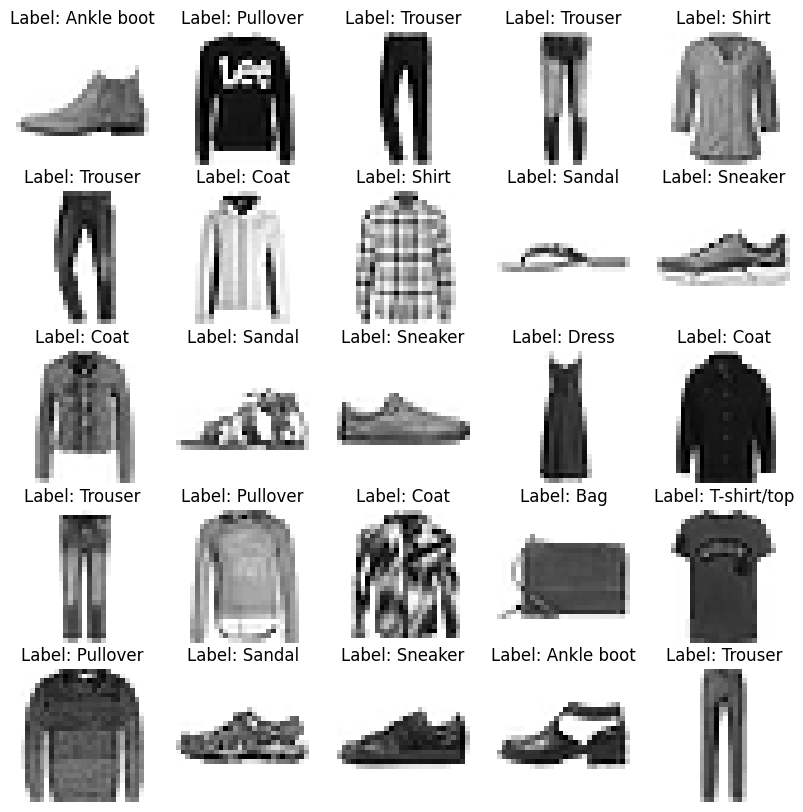

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='binary') # cmap is cool
    plt.title(f"Label: {label_description[test_labels[i]]}")
    plt.axis('off')
plt.show()

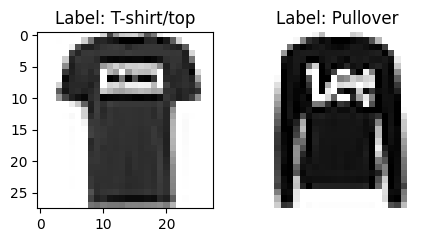

In [7]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)  # First subplot
plt.imshow(train_images[1], cmap='binary')
plt.title(f"Label: {label_description[train_labels[1]]}")
plt.subplot(1, 2, 2)  # Second subplot
plt.imshow(test_images[1], cmap='binary')
plt.title(f"Label: {label_description[test_labels[1]]}")
plt.axis('off')
plt.show()

Even after normalization, the appearance of the image remains the same. This behavior is due to a feature of Matplotlib's `imshow` function, where the display of the image remains unchanged regardless of whether the pixel values are normalized or not. The normalization process only affects how the pixel values are interpreted by the model during training, but the visual representation of the image remains consistent for visualization purposes.

2. Train a dense neural network using Keras (2 points)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Flatten the images from 28x28 to a 1D array of 784 pixels
train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(784,)), 
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32)
# reduced batch_size, so that model can learn from each sample more frequently but may be slower

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4961 - accuracy: 0.8255
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3746 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3105 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2930 - accuracy: 0.8910


3. Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [9]:
prediction = model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


In [10]:
display(prediction)
# Every row has 10 classes, each with a probability
print('total data in test_images',len(prediction))
prediction_labels = np.argmax(prediction, axis=1)
print(prediction_labels)

array([[2.21707916e-04, 1.34592256e-07, 1.83189297e-06, ...,
        2.33805329e-01, 3.29728331e-03, 6.73450053e-01],
       [3.48904054e-04, 4.39066040e-11, 9.93369937e-01, ...,
        2.25880580e-13, 3.06712131e-08, 1.04198944e-13],
       [1.06830066e-06, 9.99998868e-01, 8.71104508e-11, ...,
        1.40528494e-21, 2.08759034e-11, 4.22819493e-15],
       ...,
       [9.41591352e-05, 3.26053518e-09, 1.74451343e-05, ...,
        4.93504615e-09, 9.99713659e-01, 1.05377955e-11],
       [4.82625566e-08, 9.99982178e-01, 9.17361520e-10, ...,
        3.14009954e-14, 2.78469914e-09, 2.60172173e-09],
       [6.66594060e-05, 7.91766809e-07, 2.10057387e-05, ...,
        5.74249402e-03, 3.34826089e-03, 8.32002570e-06]], dtype=float32)

total data in test_images 10000
[9 2 1 ... 8 1 5]


In [11]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)
print("Test Loss", test_loss)

313/313 [==============================] - 2s 4ms/step - loss: 0.3441 - accuracy: 0.8789
Test accuracy: 0.8788999915122986
Test Loss 0.34410232305526733


The dense neural network achieved a test accuracy of approximately 87.51%. The confusion matrix provides a breakdown of the model's predictions for each class in the fMNIST dataset. Rows represent the true classes, while columns represent the predicted classes

Confusion Matrix:
[[871   0   8  24   6   1  83   0   7   0]
 [  3 970   0  20   4   0   2   0   1   0]
 [ 29   1 741  15 123   1  86   0   4   0]
 [ 24   9   7 898  28   0  29   0   5   0]
 [  0   1  68  37 827   0  63   0   4   0]
 [  0   0   0   0   0 970   0  20   1   9]
 [149   2  57  33  76   0 669   0  14   0]
 [  0   0   0   0   0  16   0 976   0   8]
 [  9   0   0   5   3   2   7   4 970   0]
 [  0   0   0   0   0  13   1  89   0 897]]


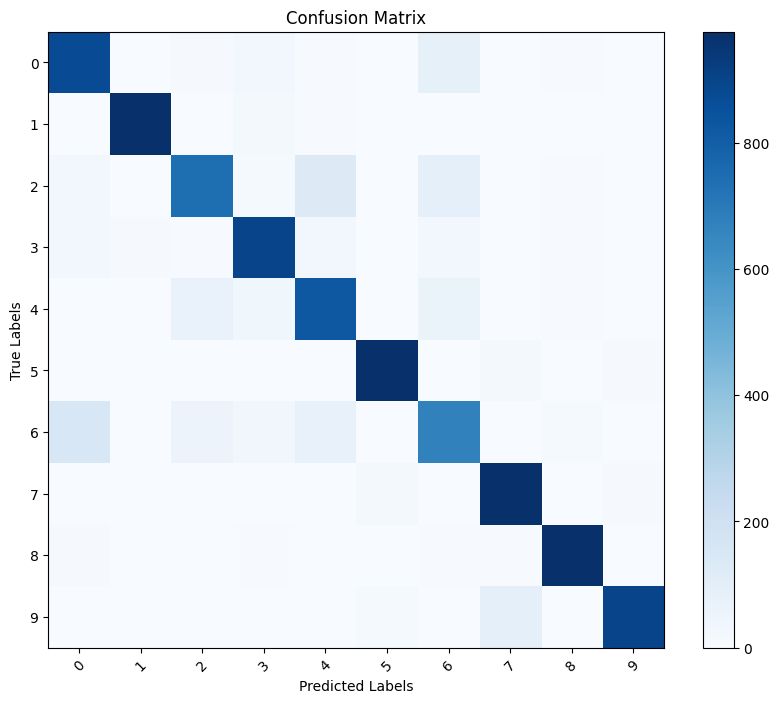

In [12]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(len(label_description)), label_description, rotation=45)
plt.yticks(np.arange(len(label_description)), label_description)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

the diagonal elements represent correct classifications (true positives), while off-diagonal elements represent misclassifications. For example, in row 1 and column 7, the number 105 means that 105 T-shirt/top images were misclassified as shirts. Overall, the model performs reasonably well, but there are some challenges in distinguishing between certain classes, such as Pullover and Coat or Shirt and T-shirt/top. Further analysis and model tuning may be necessary to improve the performance on these specific misclassified classes.

Total number of incorrect indices 1211


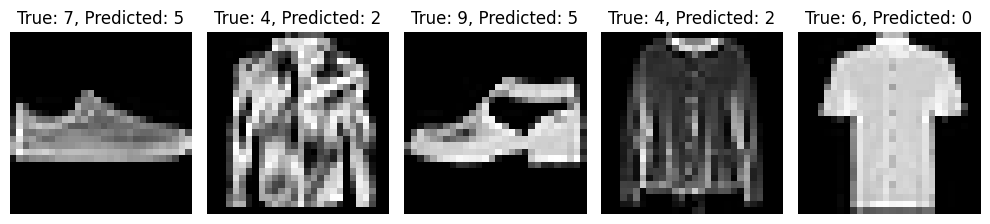

In [13]:
incorrect_indices = np.where(test_labels != prediction_labels)[0]
print('Total number of incorrect indices',len(incorrect_indices))
num_examples_to_explore = 5
plt.figure(figsize=(10, 10))

for i, idx in enumerate(incorrect_indices[:num_examples_to_explore]):
    plt.subplot(1, num_examples_to_explore, i + 1)
    plt.imshow(test_images[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {test_labels[idx]}, Predicted: {prediction_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
from sklearn.metrics import classification_report

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Classification Report:")
print(classification_report(test_labels, prediction_labels, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.74      0.79      1000
       Dress       0.87      0.90      0.88      1000
        Coat       0.78      0.83      0.80      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.71      0.67      0.69      1000
     Sneaker       0.90      0.98      0.93      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.98      0.90      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Little more information on the model.

- The model achieves high precision and recall for classes such as "Trouser," "Sandal," "Bag," and "Ankle boot," indicating strong performance in correctly classifying these items.

- Classes like "T-shirt/top," "Dress," and "Coat" have good precision and recall but slightly lower than the ones mentioned above.

- The "Pullover" and "Shirt" classes have lower precision and recall, indicating that the model struggles relatively more with these items.

- The macro-average F1-score, which gives equal weight to each class, is 0.88, suggesting an overall decent performance.

- The weighted average F1-score, which accounts for class imbalance, is also 0.88, indicating a balanced performance across different classes.

